Heigon Soldera 217638
Rafael Galib 204904

# Introdução

Para cada chute nos foi fornecido um arquivo .dat com leituras de 20 pontos representados
por suas coordenadas X, Y e Z. Para cada chute iremos encontrar uma regressão que descreva X em função de Y, para então encontrar uma regressão para Z em função de X e Y.
Em cada regressão iremos calcular a curva que melhor se ajusta aos dados tendo como referência os valores da função custo associada à descida de gradiente do polinômio a ser estimado.

# Regressão Linear Univariada

Para o cálculo de Y em função de X para cada chute, iremos utilizar do seguinte:

## Hipótese
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y$


## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $


## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $ 
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  

## Atualização dos $\theta$ 
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $ 
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $

## Erro qudrático médio (MSE)
## $ \frac{1}{n} \sum_{j=1}^n (h_j - x_j)^2 $

# Definição da função de regressão
Aqui utilizaremos todas as equações supracitadas para, ao retorno da função, termos os valores 
calculados pela função custo, assim como os novos valores de X a partir dos pontos Y da leitura, que nos servirão para calcular o MRS. Também iremos criar n valores para Y de forma a atribuir valores de X estimados para serem plotados.

In [873]:
def LinRegUni(t0A,t1A,alpha,m,X,Y,Jep):

    def h(t0,t1,y):     # Def da função hipótese
        x = t0 + t1*y 
        return x

    def Cost(t0,t1,X,Y,m):  #Def da função custo
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,Y[i]) - X[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,X,Y,m)

    listJ = [jA]
    
    for i in range(Jep): # Quantidade e épocas passada por parâmetro

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A, Y[i]) - X[i]) * 1
        t0N = t0A - (alpha/m) * soma
                                            # Calculos dos novos thetas
        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,Y[i]) - X[i]) * Y[i]
        t1N = t1A - (alpha/m) * soma

        jN = Cost(t0N,t1N,X,Y,m)
        listJ.append(jN)
                                    
        t0A = t0N
        t1A = t1N

    newX = []
    for i in range(m):  # Aqui calculamos novos valores de X com base nos Y da entrada
        newX.append(h(t0N,t1N,Y[i]))
    
    
    y = 2.1     # Aqui traçamos a partir do ponto do diagrama da atividade, n valores de Y e
                #calculamos seus respectivos X
    preX = []
    preY = []
    while(y>=0):
        preX.append(h(t0N,t1N,y))
        preY.append(y)
        y-= 0.05

    soma = 0
    for j in range(m):  # Calculo do MSE
        soma += (newX[j] - X[j])**2
    mse = soma/m
 
    return listJ,newX,preX,preY,mse

# Regressão Polinomial Univariada

Tal qual a linear, desta vez utilizaremos:

## Hipótese 
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y + \theta_2 y^2$


## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $


## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $


## Atualização dos $\theta$ 
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $ 
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $ 
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $

## Erro qudrático médio (MSE)
## $ \frac{1}{n} \sum_{j=1}^n (h_j - x_j)^2 $
  

# Definição da função de regressão
O funcionamento é o mesmo da linear, porém, com as equações do modelo descrito logo acima.

In [874]:
def PolRegUni(t0A,t1A,t2A,alpha,m,X,Y,Jep):

    def h(t0,t1,t2,y):
        x = t0 + t1*y + t2*y**2
        return x

    def Cost(t0,t1,t2,X,Y,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,Y[i]) - X[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,X,Y,m)

    listJ = [jA]

    for i in range(Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * Y[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,Y[i]) - X[i]) * Y[i]**2
        t2N = t2A - (alpha/m) * soma

        jN = Cost(t0N,t1N,t2N,X,Y,m)
        listJ.append(jN)

        t0A = t0N
        t1A = t1N
        t2A = t2N

    newX = []
    for i in range(m):
        newX.append(h(t0N,t1N,t2N,Y[i]))
    
    y = 2.1
    preX = []
    preY = []
    while(y>=0):
        preX.append(h(t0N,t1N,t2N,y))
        preY.append(y)
        y-= 0.05

    soma = 0
    for j in range(m):
        soma += (newX[j] - X[j])**2
    mse = soma/m
 
    return listJ,newX,preX,preY,mse

## Com isso, podemos estudar os comportamentos de X em Y para os dois chutes.

Importamos os módulos necessários

In [875]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

Carregamos o primeiro chute e separamos seus valores

In [876]:
with open('kick1.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])

    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

Calculamos polinomios através de distintos valores de alpha e imprimimos seus resultados.
O numero de alphas para a regressão polinomial é menor pois valores maiores do que 0.2 apresentaram overflow

Alpha = 0.05: MSE Lin= 0.090224, Iter= 201
Alpha = 0.17: MSE Lin= 0.028595, Iter= 201
Alpha = 0.30: MSE Lin= 0.009468, Iter= 201
Alpha = 0.42: MSE Lin= 0.003552, Iter= 201
Alpha = 0.55: MSE Lin= 0.001729, Iter= 201


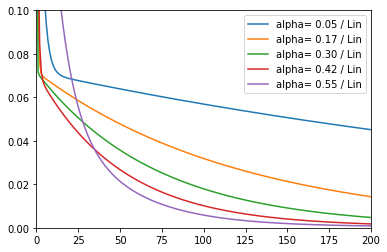

Alpha = 0.05: MSE Pol= 0.017989, Iter= 201
Alpha = 0.07: MSE Pol= 0.005873, Iter= 201
Alpha = 0.10: MSE Pol= 0.002568, Iter= 201
Alpha = 0.12: MSE Pol= 0.001670, Iter= 201
Alpha = 0.15: MSE Pol= 0.001426, Iter= 201


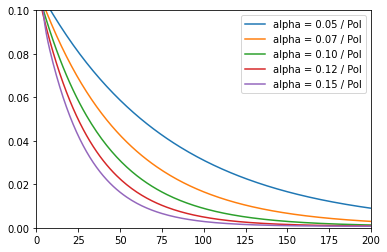

In [877]:
for alpha in np.linspace(0.05, 0.55, 5):
    listJ,newX_yLin,preX_yLin,preY_yLin,mse = LinRegUni(0,0,alpha,20,X,Y,200)

    print("Alpha = {:.2f}: MSE Lin= {:.6f}, Iter= {}".format(alpha, mse, len(listJ)))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha= {:.2f} / Lin'.format(alpha))
    plt.legend()

plt.xlim(0, 200)
plt.ylim(0, 0.1)
plt.show()

for alpha in np.linspace(0.05, 0.15, 5):
        
    listJ,newX_yPol,preX_yPol,preY_yPol,mse = PolRegUni(0,0,0,alpha,20,X,Y,200)

    print("Alpha = {:.2f}: MSE Pol= {:.6f}, Iter= {}".format(alpha, mse, len(listJ)))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 200)
plt.ylim(0, 0.1)
plt.show()

Dos gráficos da célula anterior verificamos que a regressão linear com alpha = 0.55 apresentou o menor MSR dos testes. Iremos plotar os pontos lidos e estimados utilizando a curva calculada com este alpha.

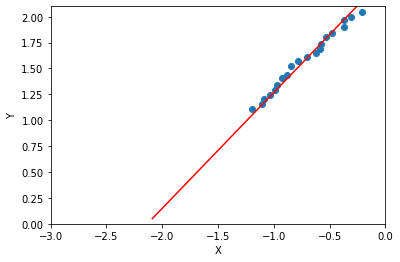

In [878]:
listJ,newX_yLin,preX_yLin,preY_yLin,mse = LinRegUni(0,0,0.55,20,X,Y,200)
plt.scatter(X,Y)
plt.plot(preX_yLin,preY_yLin, 'r')
plt.xlim(-3, 0)
plt.ylim(0, 2.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Leitura do segundo chute

In [879]:
with open('kick2.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])

    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

Execução para o segundo chute

Alpha = 0.05: MSE Lin= 0.022270
Alpha = 0.17: MSE Lin= 0.007095
Alpha = 0.30: MSE Lin= 0.002385
Alpha = 0.42: MSE Lin= 0.000928
Alpha = 0.55: MSE Lin= 0.000479


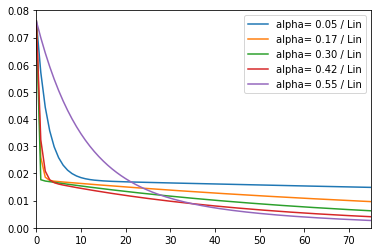

Alpha = 0.05: MSE Pol= 0.004502
Alpha = 0.07: MSE Pol= 0.001511
Alpha = 0.10: MSE Pol= 0.000696
Alpha = 0.12: MSE Pol= 0.000474
Alpha = 0.15: MSE Pol= 0.000414


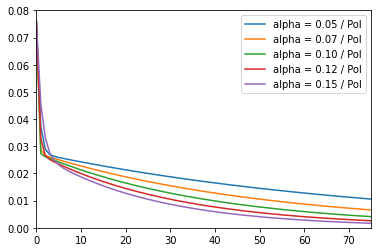

In [880]:
for alpha in np.linspace(0.05, 0.55, 5):
    listJ,newX_yLin,preX_yLin,preY_yLin,mse = LinRegUni(0,0,alpha,20,X,Y,200)

    print("Alpha = {:.2f}: MSE Lin= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha= {:.2f} / Lin'.format(alpha))
    plt.legend()

plt.xlim(0, 75)
plt.ylim(0, 0.08)
plt.show()

for alpha in np.linspace(0.05, 0.15, 5):
        
    listJ,newX_yPol,preX_yPol,preY_yPol,mse = PolRegUni(0,0,0,alpha,20,X,Y,200)

    print("Alpha = {:.2f}: MSE Pol= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 75)
plt.ylim(0, 0.08)
plt.show()

Verifica-se que assim como no kick1, adotamos a regressão linear com alpha = 0.55 como a mais adequada.

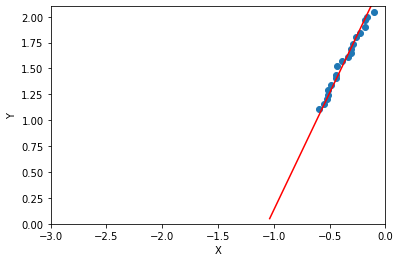

In [881]:
listJ,newX_yLin,preX_yLin,preY_yLin,mse = LinRegUni(0,0,0.55,20,X,Y,200)
plt.scatter(X,Y)
plt.plot(preX_yLin,preY_yLin, 'r')
plt.xlim(-3, 0)
plt.ylim(0, 2.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Regressões Multivariadas
  
Agora iremos utilizar a regressão de x em função de y para calcular regressões de z em função de x e y, a seguir apresentamos as regressões utilizadas.

# Regressão Linear Multivariada

## Hipótese 
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y$

## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## Atualização dos $\theta$
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $ 
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## Erro qudrático médio (MSE)
## $ \frac{1}{n} \sum_{j=1}^n (h_j - z_j)^2 $

In [882]:
def LinRegMult(t0A,t1A,t2A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,x,y):
        z = t0 + t1*x + t2*y
        return z

    def Cost(t0,t1,t2,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,X,Y,Z,m)

    listJ = [jA]

    for i in range(Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        jN = Cost(t0N,t1N,t2N,X,Y,Z,m)
        listJ.append(jN)


        t0A = t0N
        t1A = t1N
        t2A = t2N

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,X[i],Y[i]))  
 
    listJNot,newXNot,preX,preY,mseNot = LinRegUni(0,0,0.55,20,X,Y,200) # Aqui utilizaremos a melhor regressão univariada para x en função de y que calculamos

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,preX[i],preY[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    mse = soma/m
 
    return listJ,newZ,preX,preY,preZ,mse

# Regressão Polinomial Multivariada de 2º grau

## Hipótese
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2$


## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $


## Derivadas  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $ 
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $


## Atualização dos $\theta$ 
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $ 
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $ 
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

## Erro qudrático médio (MSE)
## $ \frac{1}{n} \sum_{j=1}^n (h_j - z_j)^2 $

In [883]:
def PolRegMult2(t0A,t1A,t2A,t3A,t4A,t5A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,t3,t4,t5,x,y):
        z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2
        return z

    def Cost(t0,t1,t2,t3,t4,t5,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,t3,t4,t5,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,t3A,t4A,t5A,X,Y,Z,m)

    listJ = [jA]

    for i in range(Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
        t3N = t3A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]**2
        t4N = t4A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]**2
        t5N = t5A - (alpha/m) * soma


        jN = Cost(t0N,t1N,t2N,t3N,t4N,t5N,X,Y,Z,m)
        listJ.append(jN)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        t3A = t3N
        t4A = t4N
        t5A = t5N

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,X[i],Y[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    mse = soma/m

    listJNot,newXNot,preX,preY,mseNot = LinRegUni(0,0,0.55,20,X,Y,200)

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,preX[i],preY[i]))

    return listJ,newZ,preX,preY,preZ,mse

# Regressão Polinomial Multivariada de 3º grau

## Hipótese 
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2  + \theta_5 x^2y + \theta_6 xy^2 + \theta_7 x^3  + \theta_8 y^3 $


## Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $


## Derivadas 
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $ 
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $
## $ \frac{\partial}{\partial \theta_6} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $
## $ \frac{\partial}{\partial \theta_7} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^3 $
## $ \frac{\partial}{\partial \theta_8} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^3 $

# Atualização dos $\theta$
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $
## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $
## $\theta_{6} := \theta_{6} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $
## $\theta_{7} := \theta_{7} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^3 $
## $\theta_{8} := \theta_{8} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^3 $

## Erro qudrático médio (MSE)
## $ \frac{1}{n} \sum_{j=1}^n (h_j - z_j)^2 $

In [884]:
def PolRegMult3(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,alpha,m,X,Y,Z,Jep):

    def h(t0,t1,t2,t3,t4,t5,t6,t7,t8,x,y):
        z = t0 + t1*x + t2*y + t3 * (x**2) + t4 * (y**2) + t5 * ((x**2) * y) + t6 * (x * (y**2)) + t7 * x**3 + t8 * y**3
        return z

    def Cost(t0,t1,t2,t3,t4,t5,t6,t7,t8,X,Y,Z,m):
        soma = 0
        for i in range(m):
            soma += (h(t0,t1,t2,t3,t4,t5,t6,t7,t8,X[i],Y[i]) - Z[i])**2
        value = (1/(2*m)) * soma
        return value

    jA = Cost(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X,Y,Z,m)

    listJ = [jA]

    for i in range(Jep):

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * 1
        t0N = t0A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * X[i]
        t1N = t1A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * Y[i]
        t2N = t2A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ( X[i]**2 )
        t3N = t3A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (Y[i]**2)
        t4N = t4A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ((X[i]**2) * Y[i])
        t5N = t5A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i] * (Y[i]**2))
        t6N = t6A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i]**3)
        t7N = t7A - (alpha/m) * soma

        soma = 0
        for i in range(m):
            soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (Y[i]**3)
        t8N = t8A - (alpha/m) * soma


        jN = Cost(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X,Y,Z,m)
        listJ.append(jN)

        t0A = t0N
        t1A = t1N
        t2A = t2N
        t3A = t3N
        t4A = t4N
        t5A = t5N
        t6A = t6N
        t7A = t7N
        t8A = t8N

    newZ = []
    for i in range(m):
        newZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X[i],Y[i]))

    soma = 0
    for j in range(m):
        soma += (newZ[j] - Z[j])**2
    mse = soma/m

    listJNot,newXNot,preX,preY,mseNot = LinRegUni(0,0,0.55,20,X,Y,200)

    preZ = []
    for i in range(len(preX)):
        preZ.append(h(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,preX[i],preY[i]))

    return listJ,newZ,preX,preY,preZ,mse

# Estudos dos chutes a partir das regressões apresentadas
  
A partir de agora iremos avaliar qual a melhor regressão para cada chute e demonstrar os resultados a partir das funções a seguir para o plotar os gráficos.

In [885]:
def plotNewZ(X,Y,Z,newZ): # Plota os novos Z calculados a partir da regressão
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(X, Y, Z)
    ax.scatter3D(X,Y,newZ,'r')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 2.5)
    ax.set_zlim(0, 0.4)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title("Campo")
    plt.show()

In [886]:
def plotPrePath(X,Y,Z,preX,preY,preZ): # Plota o caminho previsto pela regressão
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(X, Y, Z)
    ax.plot3D(preX,preY,preZ,'r')
    ax.scatter3D(X, Y, np.zeros(len(Z)),color='grey')
    ax.plot3D(preX, preY, np.zeros(len(preZ)),'grey')
    ax.scatter3D(X, np.ones(len(Y)) * 3, Z,color='grey')
    ax.scatter3D(np.ones(len(X)) * (-3), Y, Z,color='grey')
    ax.plot3D(preX, np.ones(len(preY)) * 3, preZ,'grey')
    ax.plot3D(np.ones(len(preX)) * (-3), preY, preZ,'grey')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 2.5)
    ax.set_zlim(0, 0.4)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title("Campo")
    plt.show()

# Avaliando parâmetros para o chute 1

In [887]:
with open('kick1.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])

    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

Alpha = 0.05: MSE Lin= 0.000230
Alpha = 0.14: MSE Lin= 0.000207
Alpha = 0.23: MSE Lin= 0.000203
Alpha = 0.31: MSE Lin= 0.000201
Alpha = 0.40: MSE Lin= 0.000199


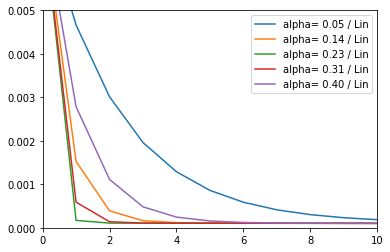

Alpha = 0.05: MSE Pol= 0.000287
Alpha = 0.07: MSE Pol= 0.000240
Alpha = 0.10: MSE Pol= 0.000216
Alpha = 0.12: MSE Pol= 0.000203
Alpha = 0.15: MSE Pol= 0.000456


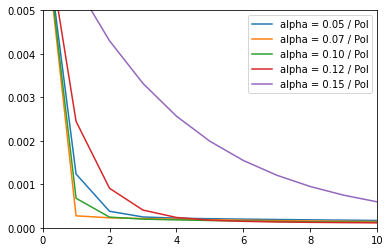

Alpha = 0.05: MSE Pol= 0.000346
Alpha = 0.07: MSE Pol= 18001.561842


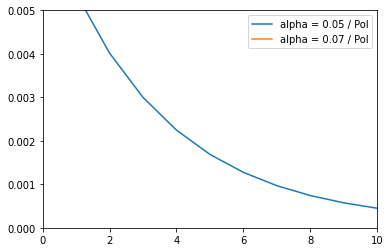

In [888]:
for alpha in np.linspace(0.05, 0.4, 5):
    listJ,newZ_Lin,preX_Lin,preY_Lin,preZ_Lin,mse = LinRegMult(0,0,0,alpha,20,X,Y,Z,15)

    print("Alpha = {:.2f}: MSE Lin= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha= {:.2f} / Lin'.format(alpha))
    plt.legend()

plt.xlim(0, 10)
plt.ylim(0, 0.005)
plt.show()

for alpha in np.linspace(0.05, 0.15, 5):
        
    listJ,newZ_Pol2,preX_Pol2,preY_Pol2,preZ_Pol2,mse = PolRegMult2(0,0,0,0,0,0,alpha,20,X,Y,Z,15)
    print("Alpha = {:.2f}: MSE Pol= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 10)
plt.ylim(0, 0.005)
plt.show()

for alpha in np.linspace(0.05, 0.07, 2):
        
    listJ,newZ_Pol3,preX_Pol3,preY_Pol3,preZ_Pol3,mse = PolRegMult3(0,0,0,0,0,0,0,0,0,alpha,20,X,Y,Z,15)

    print("Alpha = {:.2f}: MSE Pol= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 10)
plt.ylim(0, 0.005)
plt.show()

Podemos ver que o menor erro foi a regressão linear com alpha igual 0.4, sendo assim, utilizaremos esse resultado para a regressão do primeiro chute.

In [889]:
listJ,newZ_Lin,preX_Lin,preY_Lin,preZ_Lin,mse = LinRegMult(0,0,0,0.4,20,X,Y,Z,15)

Com isso podemos visualizar como ficariam os novos valores para z a partir dessa regressão.

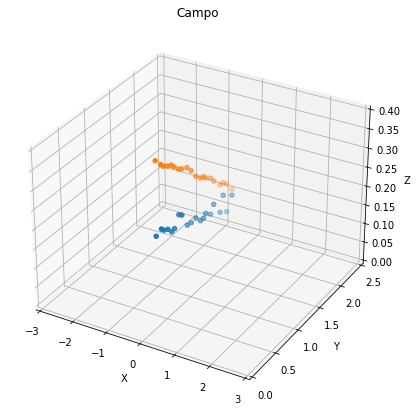

In [890]:
plotNewZ(X,Y,Z,newX_Lin)

E finalmente prever o caminho do chute.

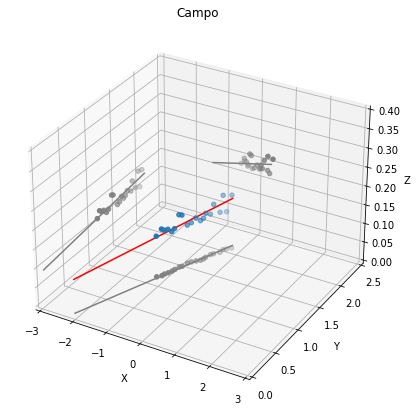

In [891]:
plotPrePath(X,Y,Z,preX_Lin,preY_Lin,preZ_Lin)

A seguir apresenta-se os melhores resultados das outras regressões para podermos ter uma visualização gráfica do motivo de não terem sido as melhores

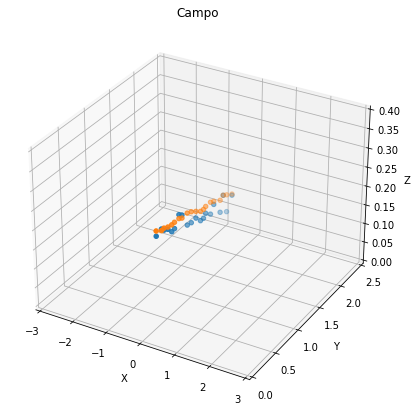

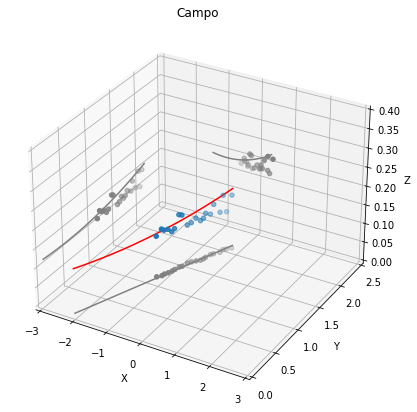

In [892]:
# Polinomial de segundo grau
listJ,newZ_Pol2,preX_Pol2,preY_Pol2,preZ_Pol2,mse = PolRegMult2(0,0,0,0,0,0,0.15,20,X,Y,Z,15)
plotNewZ(X,Y,Z,newZ_Pol2)
plotPrePath(X,Y,Z,preX_Pol2,preY_Pol2,preZ_Pol2)

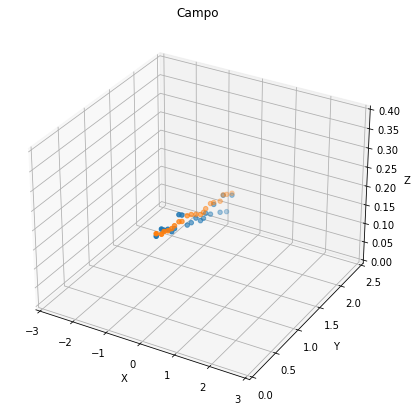

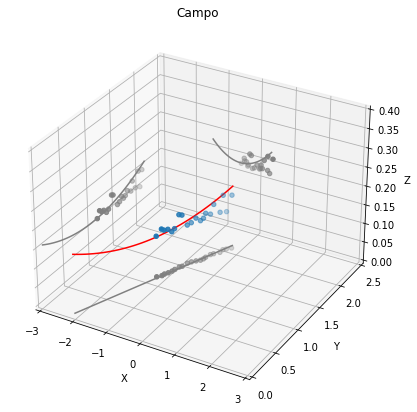

In [893]:
# Polinomial de terceiro grau
listJ,newZ_Pol3,preX_Pol3,preY_Pol3,preZ_Pol3,mse = PolRegMult3(0,0,0,0,0,0,0,0,0,0.05,20,X,Y,Z,15)
plotNewZ(X,Y,Z,newZ_Pol3)
plotPrePath(X,Y,Z,preX_Pol3,preY_Pol3,preZ_Pol3)

# Avaliando parâmetros para o chute 2

In [894]:
with open('kick2.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])

    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

Alpha = 0.05: MSE Lin= 0.000259
Alpha = 0.14: MSE Lin= 0.000258
Alpha = 0.23: MSE Lin= 0.000258
Alpha = 0.31: MSE Lin= 0.000257
Alpha = 0.40: MSE Lin= 0.000257


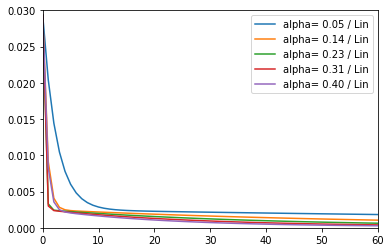

Alpha = 0.05: MSE Pol= 0.000151
Alpha = 0.08: MSE Pol= 0.000147
Alpha = 0.12: MSE Pol= 0.000145
Alpha = 0.15: MSE Pol= 0.000143
Alpha = 0.18: MSE Pol= 485240364090101593117925984658337687284824056005011106986743977160687782137006909876681727267680457707071819239597879385580342778576605517083075400676933632.000000


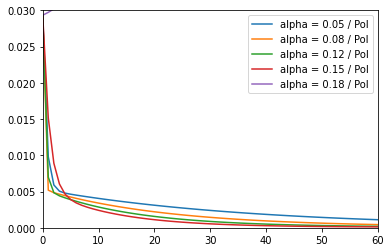

Alpha = 0.05: MSE Pol= 0.000151
<ipython-input-884-e90af365def5>:10: RuntimeWarning: overflow encountered in double_scalars
  soma += (h(t0,t1,t2,t3,t4,t5,t6,t7,t8,X[i],Y[i]) - Z[i])**2
<ipython-input-884-e90af365def5>:62: RuntimeWarning: overflow encountered in double_scalars
  soma += (h(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (Y[i]**3)
<ipython-input-884-e90af365def5>:63: RuntimeWarning: invalid value encountered in double_scalars
  t8N = t8A - (alpha/m) * soma
Alpha = 0.07: MSE Pol= nan


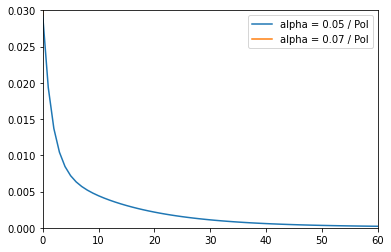

In [895]:
for alpha in np.linspace(0.05, 0.4, 5):
    listJ,newZ_Lin,preX_Lin,preY_yin,preZ_Lin,mse = LinRegMult(0,0,0,alpha,20,X,Y,Z,10000)

    print("Alpha = {:.2f}: MSE Lin= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha= {:.2f} / Lin'.format(alpha))
    plt.legend()

plt.xlim(0, 60)
plt.ylim(0, 0.03)
plt.show()

for alpha in np.linspace(0.05, 0.18, 5):
        
    listJ,newZ_Pol2,preX_Pol2,preY_Pol2,preZ_Pol2,mse = PolRegMult2(0,0,0,0,0,0,alpha,20,X,Y,Z,10000)
    print("Alpha = {:.2f}: MSE Pol= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 60)
plt.ylim(0, 0.03)
plt.show()

for alpha in np.linspace(0.05, 0.07, 2):
        
    listJ,newZ_Pol3,preX_Pol3,preY_Pol3,preZ_Pol3,mse = PolRegMult3(0,0,0,0,0,0,0,0,0,alpha,20,X,Y,Z,10000)

    print("Alpha = {:.2f}: MSE Pol= {:.6f}".format(alpha, mse))

    plt.plot(np.arange(len(listJ)), listJ, label= 'alpha = {:.2f} / Pol'.format(alpha))
    plt.legend()
    

plt.xlim(0, 60)
plt.ylim(0, 0.03)
plt.show()

Podemos ver que o menor erro foi a regressão polinomial com alpha igual 0.15, sendo assim, utilizaremos esse resultado para a regressão do segundo chute.

In [896]:
listJ,newX_Pol2,preX_Pol2,preY_Pol2,preZ_Pol2,mse = PolRegMult2(0,0,0,0,0,0,0.15,20,X,Y,Z,10000)

Com isso podemos visualizar como ficariam os novos valores para z a partir dessa regressão.

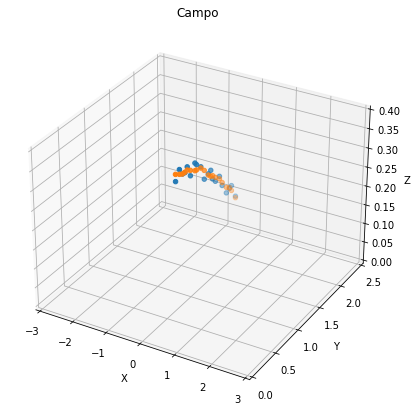

In [897]:
plotNewZ(X,Y,Z,newX_Pol2)

E finalmente prever o caminho do chute.

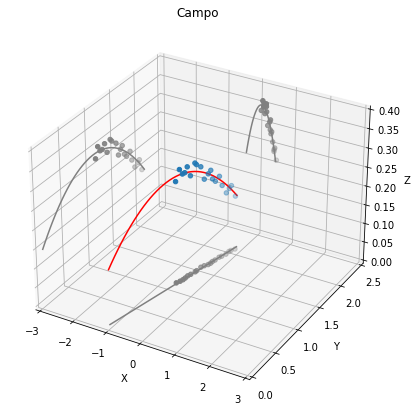

In [898]:
plotPrePath(X,Y,Z,preX_Pol2,preY_Pol2,preZ_Pol2)

A seguir apresenta-se os melhores resultados das outras regressões para podermos ter uma visualização gráfica do motivo de não terem sido as melhores

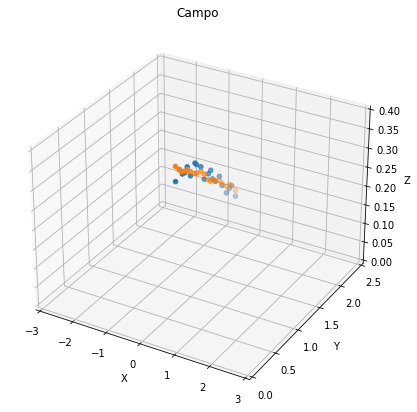

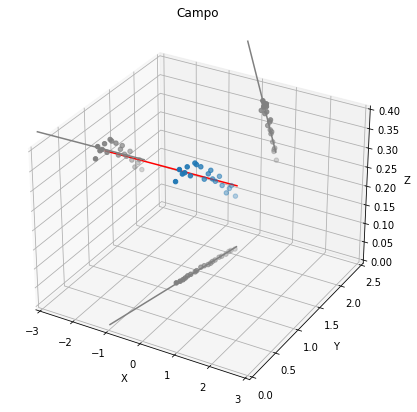

In [899]:
listJ,newZ_Lin,preX_Lin,preY_yin,preZ_Lin,mse = LinRegMult(0,0,0,0.4,20,X,Y,Z,10000)
plotNewZ(X,Y,Z,newZ_Lin)
plotPrePath(X,Y,Z,preX_Lin,preY_Lin,preZ_Lin)

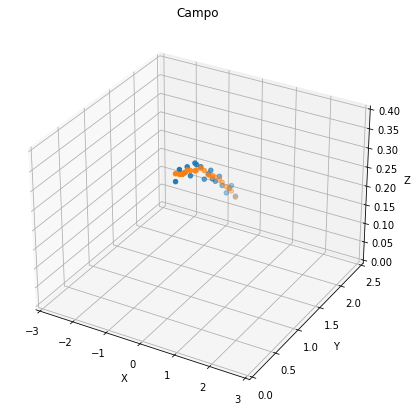

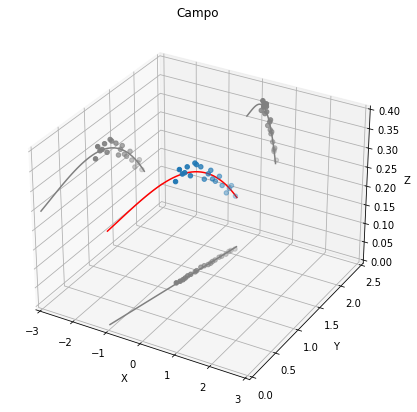

In [900]:
listJ,newZ_Pol3,preX_Pol3,preY_Pol3,preZ_Pol3,mse = PolRegMult3(0,0,0,0,0,0,0,0,0,0.05,20,X,Y,Z,10000)
plotNewZ(X,Y,Z,newZ_Pol3)
plotPrePath(X,Y,Z,preX_Pol3,preY_Pol3,preZ_Pol3)